<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pcmdpy as ppy
from astropy.io import fits
%matplotlib inline

GPU acceleration not available, sorry
No module named 'pycuda'


In [2]:
res = {}

In [3]:
regions = []
for r in [10,20,30]:
    try:
        res['r{:d}'.format(r)] = ppy.plotting.ResultsPlotter('results/m49_taufull_r{:d}.csv'.format(r),
                                                            run_name='Wide Region {:d}'.format(r))
        res['r{:d}_nm'.format(r)] = ppy.plotting.ResultsPlotter('results/m49_taunomu_r{:d}.csv'.format(r),
                                                            run_name='Wide Region {:d} (Distance Fixed)'.format(r))
#         res['r{:d}_wd'.format(r)] = ppy.plotting.ResultsPlotter('results/m49_tauwide_r{:d}.csv'.format(r),
#                                                             run_name='Region {:d} (Wide)'.format(r))
        regions.append(r)
    except:
        print('r{:d} not found'.format(r))

thin_regions = []
for r in [23, 48, 70]:
    try:
        res['t{:d}'.format(r)] = ppy.plotting.ResultsPlotter('results/m49_taufull-thin_t{:d}.csv'.format(r),
                                                            run_name='Region {:d}'.format(r))
        res['t{:d}_nm'.format(r)] = ppy.plotting.ResultsPlotter('results/m49_taunomu-thin_t{:d}.csv'.format(r),
                                                            run_name='Region {:d} (Distance Fixed)'.format(r))
#         res['r{:d}_wd'.format(r)] = ppy.plotting.ResultsPlotter('results/m49_tauwide_r{:d}.csv'.format(r),
#                                                             run_name='Region {:d} (Wide)'.format(r))
        thin_regions.append(r)
    except:
        print('t{:d} not found'.format(r))        

gauss_regions = []
for r in [23, 48, 70]:
    try:
        res['g{:d}'.format(r)] = ppy.plotting.ResultsPlotter('results/m49_taugauss_t{:d}.csv'.format(r),
                                                            run_name='Gauss Region {:d}'.format(r))
        gauss_regions.append(r)
    except:
        print('g{:d} not found'.format(r))        
        

In [4]:
res

{'g23': <pcmdpy.plotting.ResultsPlotter at 0x10e2ed0f0>,
 'g48': <pcmdpy.plotting.ResultsPlotter at 0x10e2ed6d8>,
 'g70': <pcmdpy.plotting.ResultsPlotter at 0x10e2edcc0>,
 'r10': <pcmdpy.plotting.ResultsPlotter at 0x11d4ab400>,
 'r10_nm': <pcmdpy.plotting.ResultsPlotter at 0x11d53c160>,
 'r20': <pcmdpy.plotting.ResultsPlotter at 0x11d566cc0>,
 'r20_nm': <pcmdpy.plotting.ResultsPlotter at 0x10e2db198>,
 'r30': <pcmdpy.plotting.ResultsPlotter at 0x10e2db6a0>,
 'r30_nm': <pcmdpy.plotting.ResultsPlotter at 0x10e2dbc88>,
 't23': <pcmdpy.plotting.ResultsPlotter at 0x10e2dbd68>,
 't23_nm': <pcmdpy.plotting.ResultsPlotter at 0x10e2e3518>,
 't48': <pcmdpy.plotting.ResultsPlotter at 0x10e2e3a58>,
 't48_nm': <pcmdpy.plotting.ResultsPlotter at 0x10e2e7080>,
 't70': <pcmdpy.plotting.ResultsPlotter at 0x10e2e7518>,
 't70_nm': <pcmdpy.plotting.ResultsPlotter at 0x10e2e7b00>}

In [5]:
res['r10_nm'].df['dmod'] = 31.3
res['r20_nm'].df['dmod'] = 31.3
res['r30_nm'].df['dmod'] = 31.3
res['t23_nm'].df['dmod'] = 31.3
res['t48_nm'].df['dmod'] = 31.3
res['t70_nm'].df['dmod'] = 31.3

In [6]:
xmax = np.max([len(r.df) for r in res.values()])
print(xmax)

15419


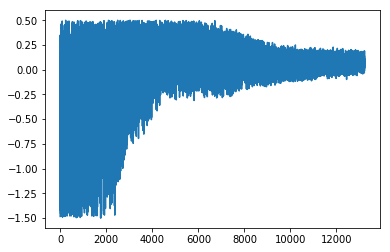

In [7]:
plt.plot(res['r10'].df['logfeh_mean'])

In [10]:
res['t23'].df.tail(1)

,nlive,niter,nc,eff,logl,logwt,logvol,logz,logzerr,h,delta_logz,time_elapsed,logfeh_mean,logdust,logNpix,tau,dmod,log_weights,weights
12938,2000.0,12939.0,72.0,12.207,-1100.9,-1133.0,-25.852,-1128.3,0.22904,26.255,26.771,146.775,0.18142,-1.2007,4.089,3.3276,30.001,-4.529116,0.01079


In [11]:
res['t23_nm'].df.tail(1)

,nlive,niter,nc,eff,logl,logwt,logvol,logz,logzerr,h,delta_logz,time_elapsed,logfeh_mean,logdust,logNpix,tau,log_weights,weights,dmod
12438,2000.0,12439.0,106.0,11.606,-2183.2,-2214.3,-24.853,-2209.6,0.22445,25.215,31.909,146.988889,0.20141,-1.0022,4.5981,4.1232,-4.508838,0.011011,31.3


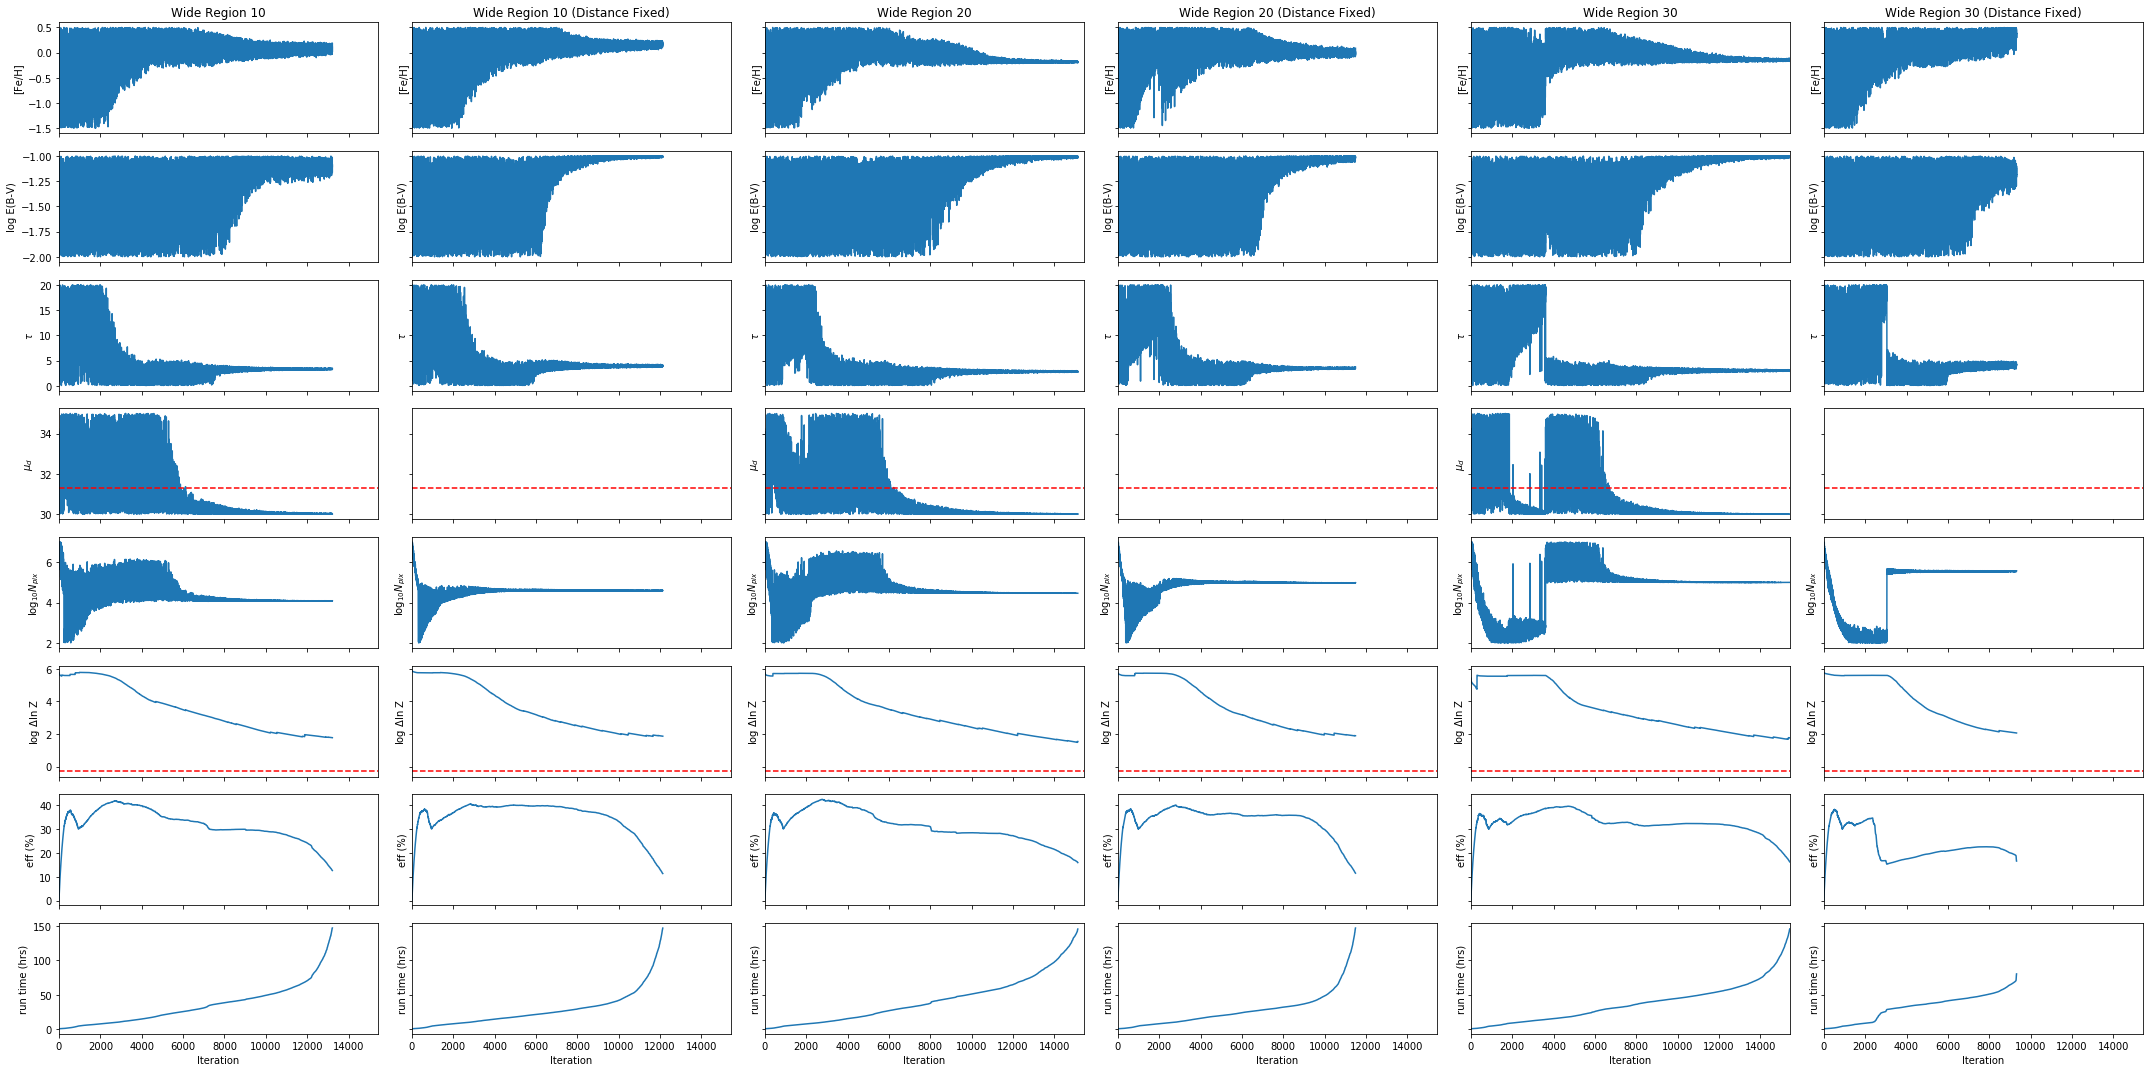

In [12]:
fig, axes = plt.subplots(ncols=2*len(regions), nrows=8, figsize=(30,15), sharex=True, sharey='row')
for i, r in enumerate(regions):
    res['r{:d}'.format(r)].plot_chains(axes=axes[:,2*i])
#     res['r{:d}_wd'.format(r)].plot_chains(axes=axes[:,3*i+1])
    res['r{:d}_nm'.format(r)].plot_chains(axes=axes[np.array([0,1,2,4,5,6,7]),2*i+1])
    for j in range(2):
        axes[3,j+2*i].axhline(y=31.3, ls='--', color='r')
axes[0,0].set_xlim(xmax=xmax)
plt.tight_layout()

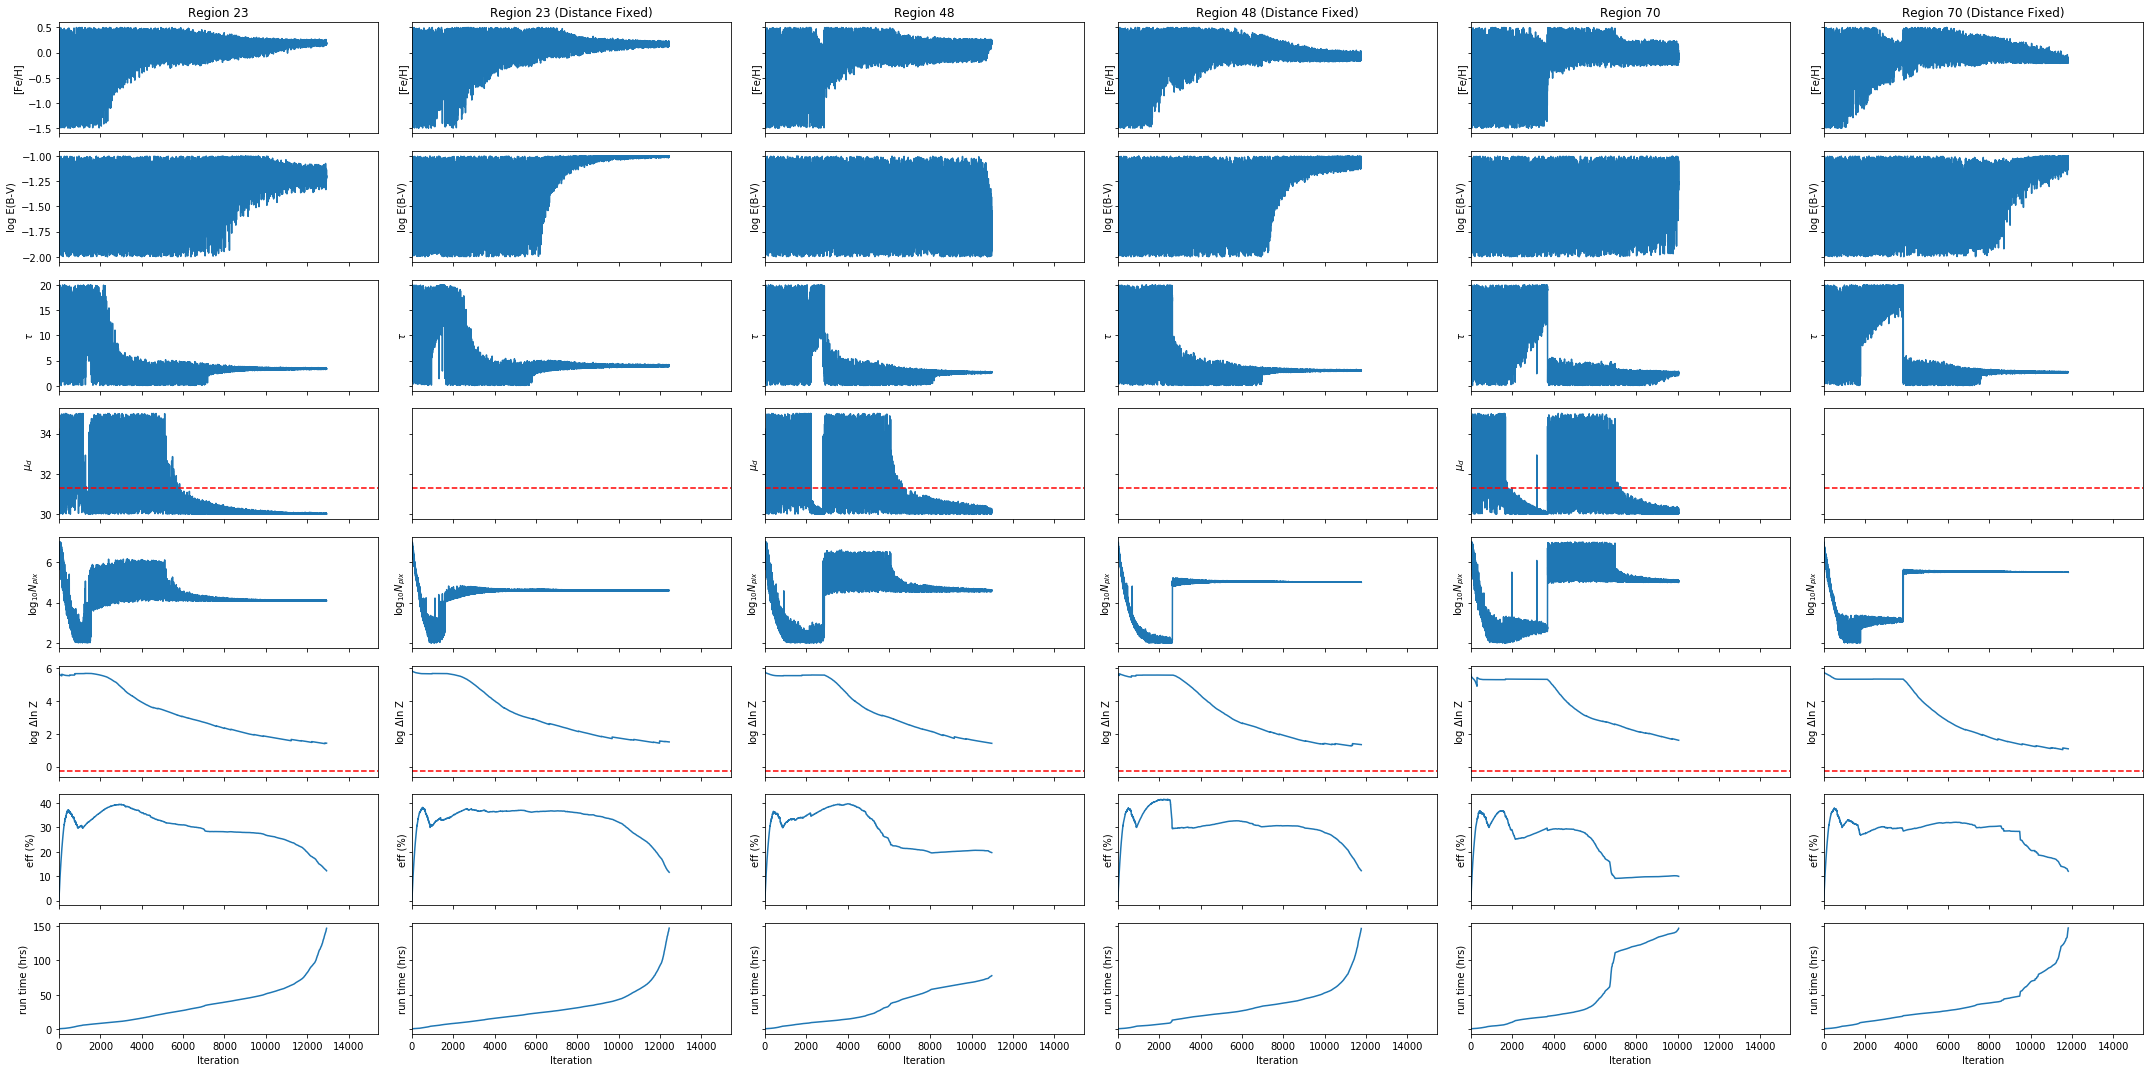

In [13]:
fig, axes = plt.subplots(ncols=2*len(thin_regions), nrows=8, figsize=(30,15), sharex=True, sharey='row')
for i, r in enumerate(thin_regions):
    res['t{:d}'.format(r)].plot_chains(axes=axes[:,2*i])
#     res['r{:d}_wd'.format(r)].plot_chains(axes=axes[:,3*i+1])
    res['t{:d}_nm'.format(r)].plot_chains(axes=axes[np.array([0,1,2,4,5,6,7]),2*i+1])
    for j in range(2):
        axes[3,j+2*i].axhline(y=31.3, ls='--', color='r')
axes[0,0].set_xlim(xmax=xmax)
plt.tight_layout()

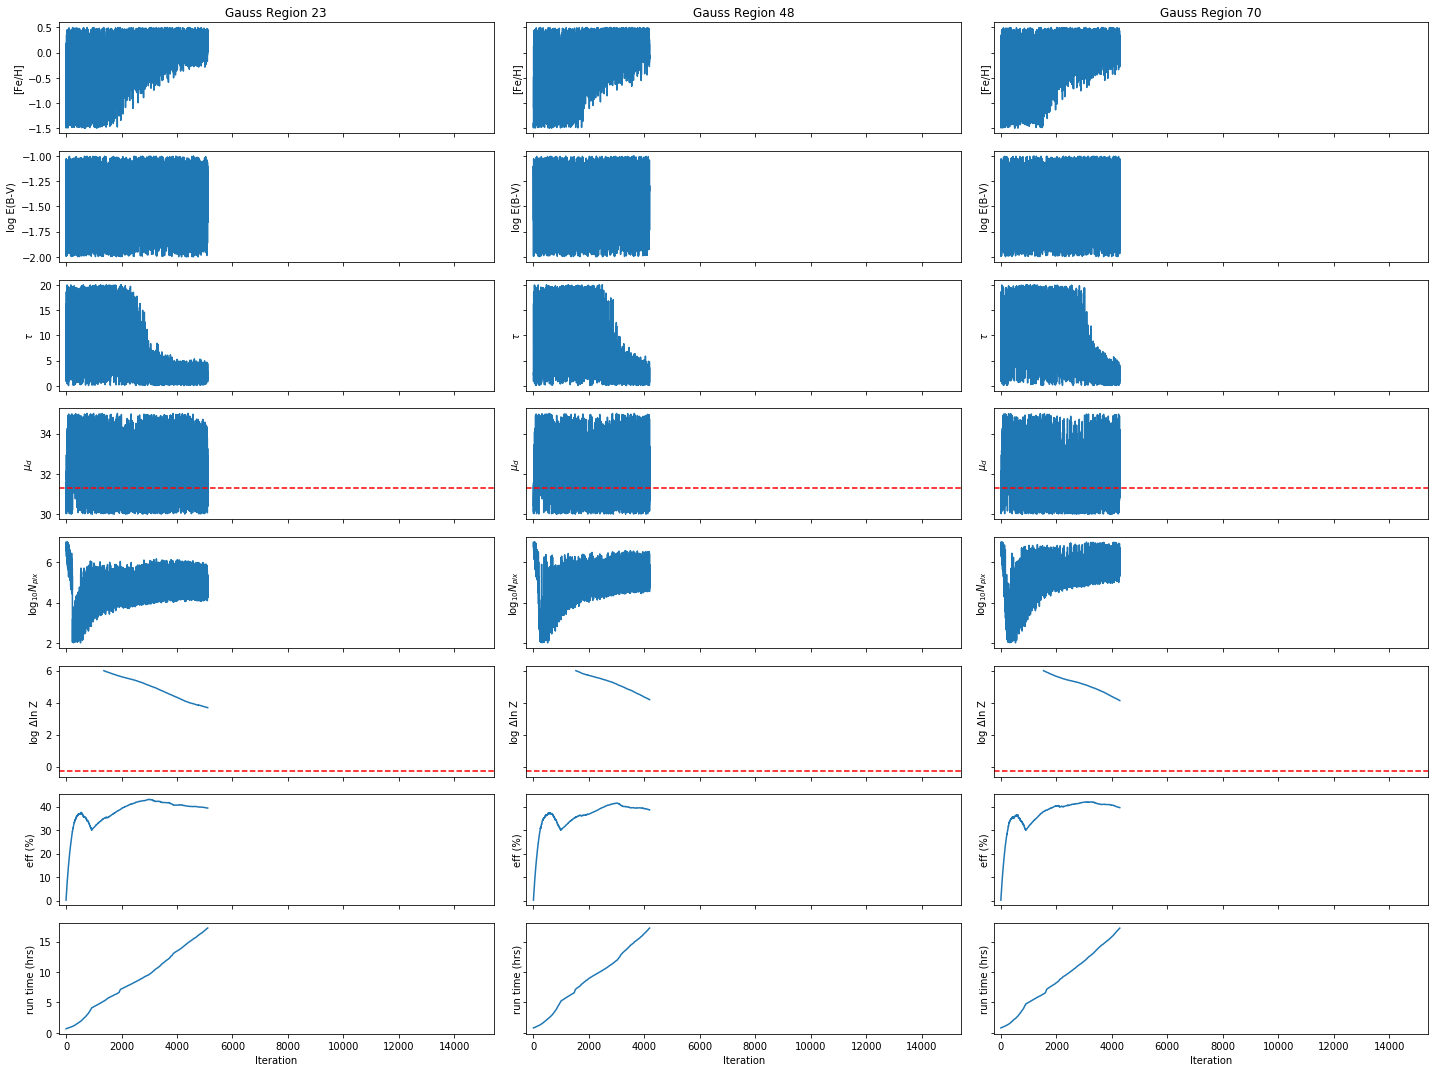

In [14]:
fig, axes = plt.subplots(ncols=len(gauss_regions), nrows=8, figsize=(20,15), sharex=True, sharey='row')
for i, r in enumerate(gauss_regions):
    res['g{:d}'.format(r)].plot_chains(axes=axes[:,i])
    axes[3,i].axhline(y=31.3, ls='--', color='r')
axes[0,0].set_xlim(xmax=xmax)
plt.tight_layout()

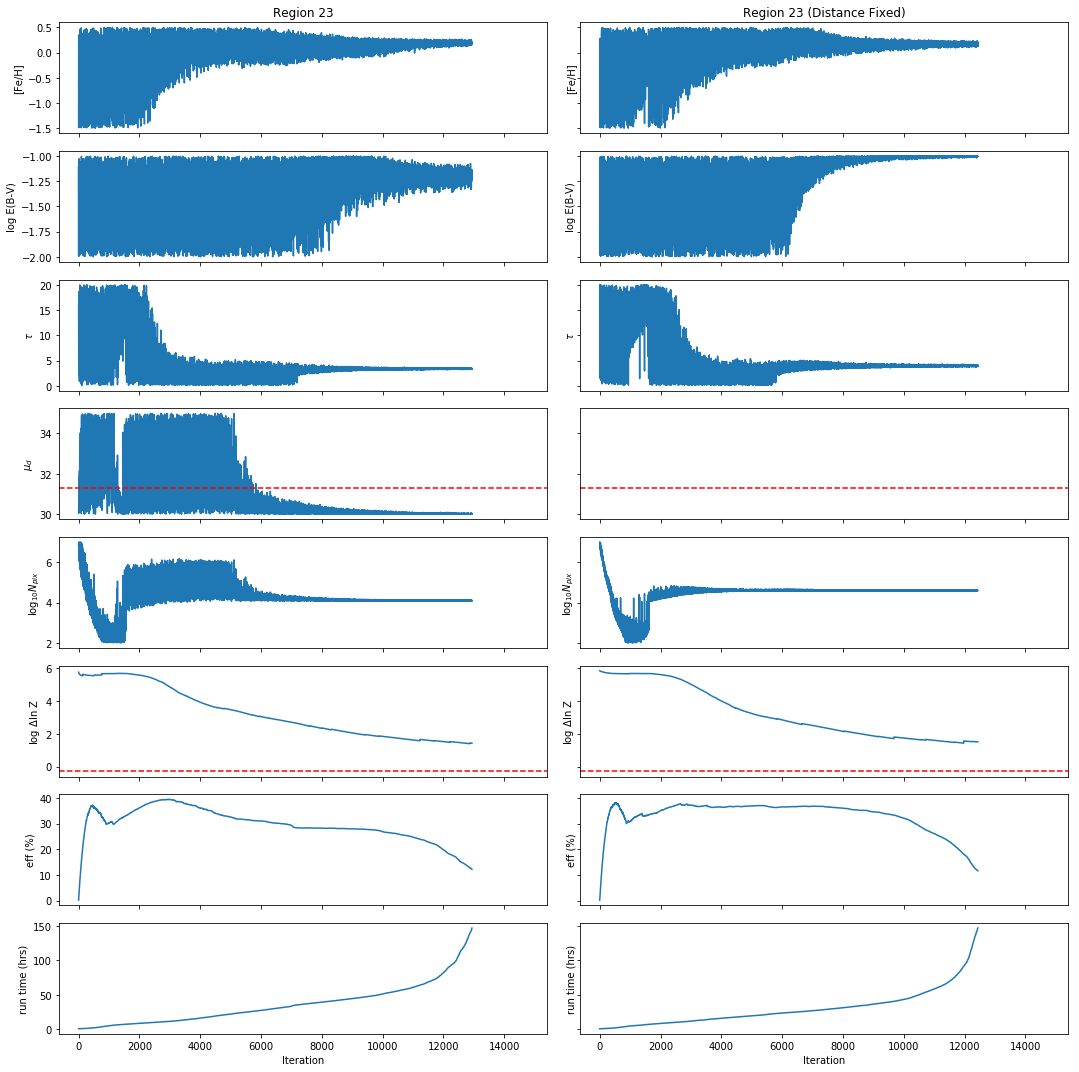

In [11]:
t = 23
fig, axes = plt.subplots(ncols=2, nrows=8, figsize=(15,15), sharex=True, sharey='row')
res['t{:d}'.format(t)].plot_chains(axes=axes[:,0])
res['t{:d}_nm'.format(t)].plot_chains(axes=axes[np.array([0,1,2,4,5,6,7]),1])
for j in range(2):
    axes[3,j].axhline(y=31.3, ls='--', color='r')
axes[0,0].set_xlim(xmax=xmax)
plt.tight_layout()
plt.savefig('figures/m49_chains_t{:d}.jpg'.format(t))
plt.savefig('figures/m49_chains_t{:d}.pdf'.format(t))

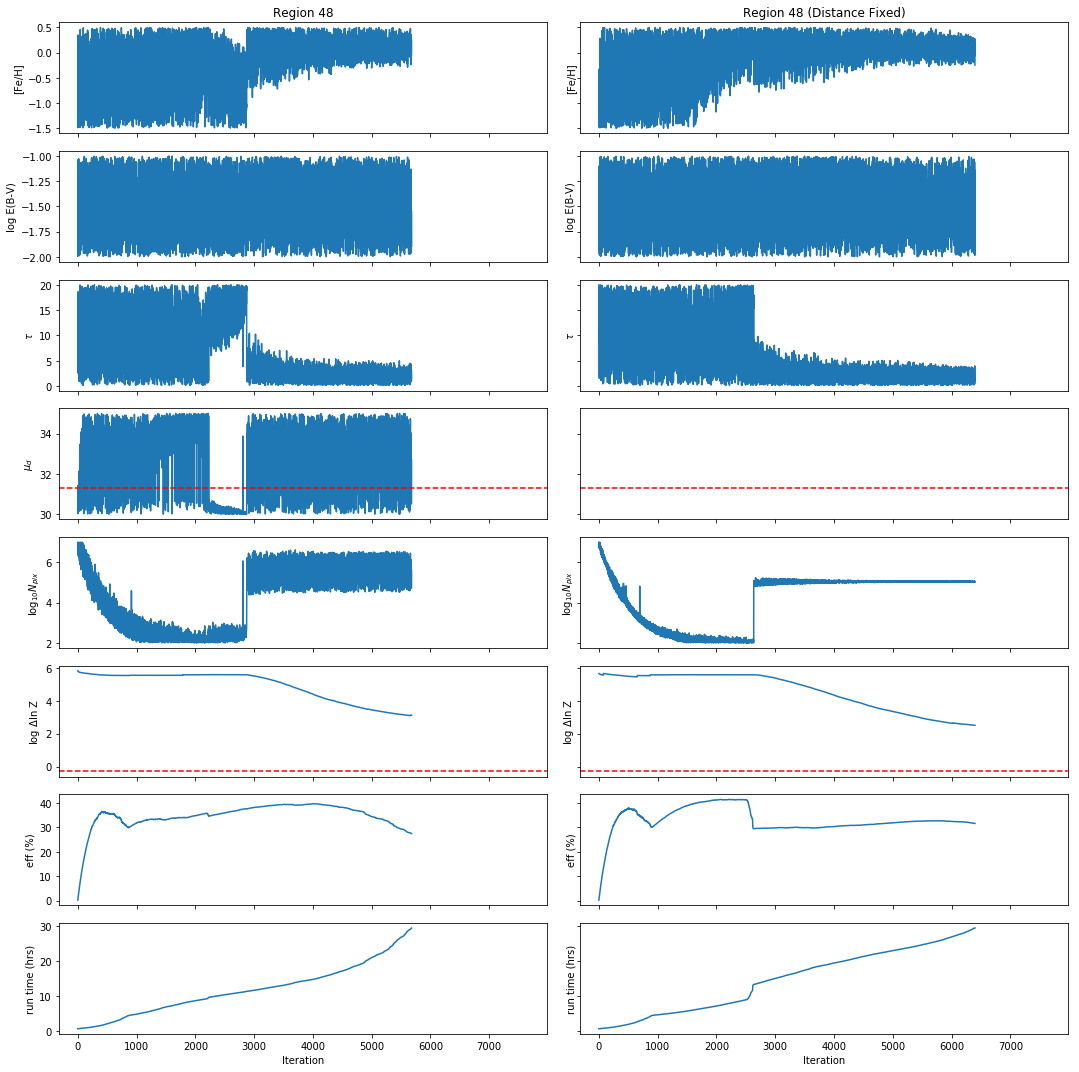

In [12]:
t = 48
fig, axes = plt.subplots(ncols=2, nrows=8, figsize=(15,15), sharex=True, sharey='row')
res['t{:d}'.format(t)].plot_chains(axes=axes[:,0])
res['t{:d}_nm'.format(t)].plot_chains(axes=axes[np.array([0,1,2,4,5,6,7]),1])
for j in range(2):
    axes[3,j].axhline(y=31.3, ls='--', color='r')
axes[0,0].set_xlim(xmax=xmax)
plt.tight_layout()
plt.savefig('figures/m49_chains_t{:d}.jpg'.format(t))
plt.savefig('figures/m49_chains_t{:d}.pdf'.format(t))

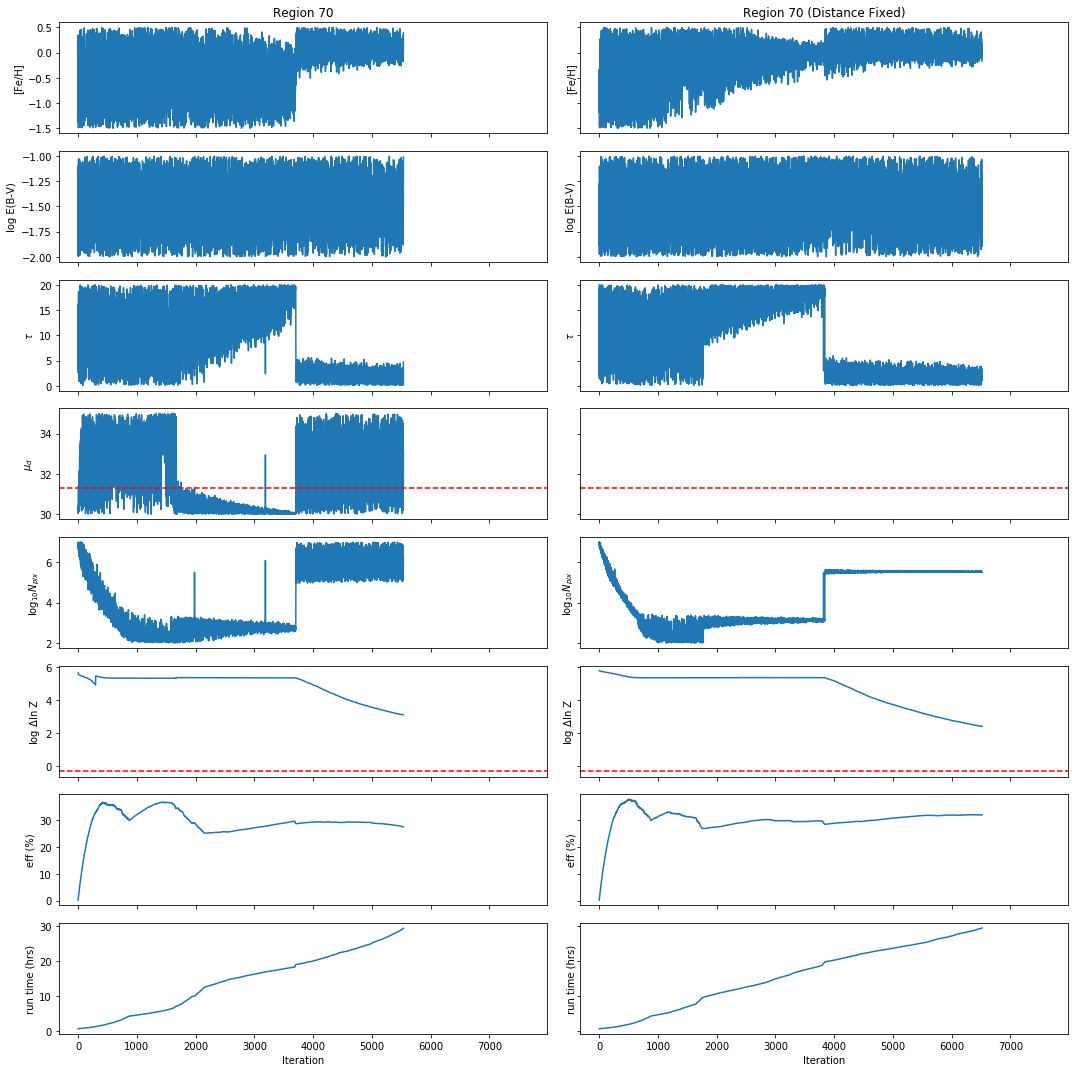

In [13]:
t = 70
fig, axes = plt.subplots(ncols=2, nrows=8, figsize=(15,15), sharex=True, sharey='row')
res['t{:d}'.format(t)].plot_chains(axes=axes[:,0])
res['t{:d}_nm'.format(t)].plot_chains(axes=axes[np.array([0,1,2,4,5,6,7]),1])
for j in range(2):
    axes[3,j].axhline(y=31.3, ls='--', color='r')
axes[0,0].set_xlim(xmax=xmax)
plt.tight_layout()
plt.savefig('figures/m49_chains_t{:d}.jpg'.format(t))
plt.savefig('figures/m49_chains_t{:d}.pdf'.format(t))

In [50]:
res['r10'].df.tail(1)[['niter', 'logfeh_mean', 'logdust', 'logNpix', 'tau', 'dmod']]

,niter,logfeh_mean,logdust,logNpix,tau,dmod
218,219.0,-0.08832,-1.6214,6.0822,12.806,34.657


In [14]:
res['r10_nm'].df.tail(1)[['niter', 'logfeh_mean', 'logdust', 'logNpix', 'tau', 'dmod']]

,niter,logfeh_mean,logdust,logNpix,tau,dmod
228,229.0,-0.84726,-1.7481,5.1877,4.2317,31.3


In [15]:
res['r20'].df.tail(1)[['niter', 'logfeh_mean', 'logdust', 'logNpix', 'tau', 'dmod']]

,niter,logfeh_mean,logdust,logNpix,tau,dmod
208,209.0,-0.79729,-1.5418,4.6282,13.798,30.018


In [16]:
res['r20_nm'].df.tail(1)[['niter', 'logfeh_mean', 'logdust', 'logNpix', 'tau', 'dmod']]

,niter,logfeh_mean,logdust,logNpix,tau,dmod
228,229.0,-1.108,-1.9613,5.0793,11.336,31.3


In [17]:
res['r30'].df.tail(1)[['niter', 'logfeh_mean', 'logdust', 'logNpix', 'tau', 'dmod']]

,niter,logfeh_mean,logdust,logNpix,tau,dmod
208,209.0,-1.1333,-1.293,4.9231,9.3411,31.669


In [18]:
res['r30_nm'].df.tail(1)[['niter', 'logfeh_mean', 'logdust', 'logNpix', 'tau', 'dmod']]

,niter,logfeh_mean,logdust,logNpix,tau,dmod
228,229.0,-0.85975,-1.4733,5.1486,17.642,31.3
